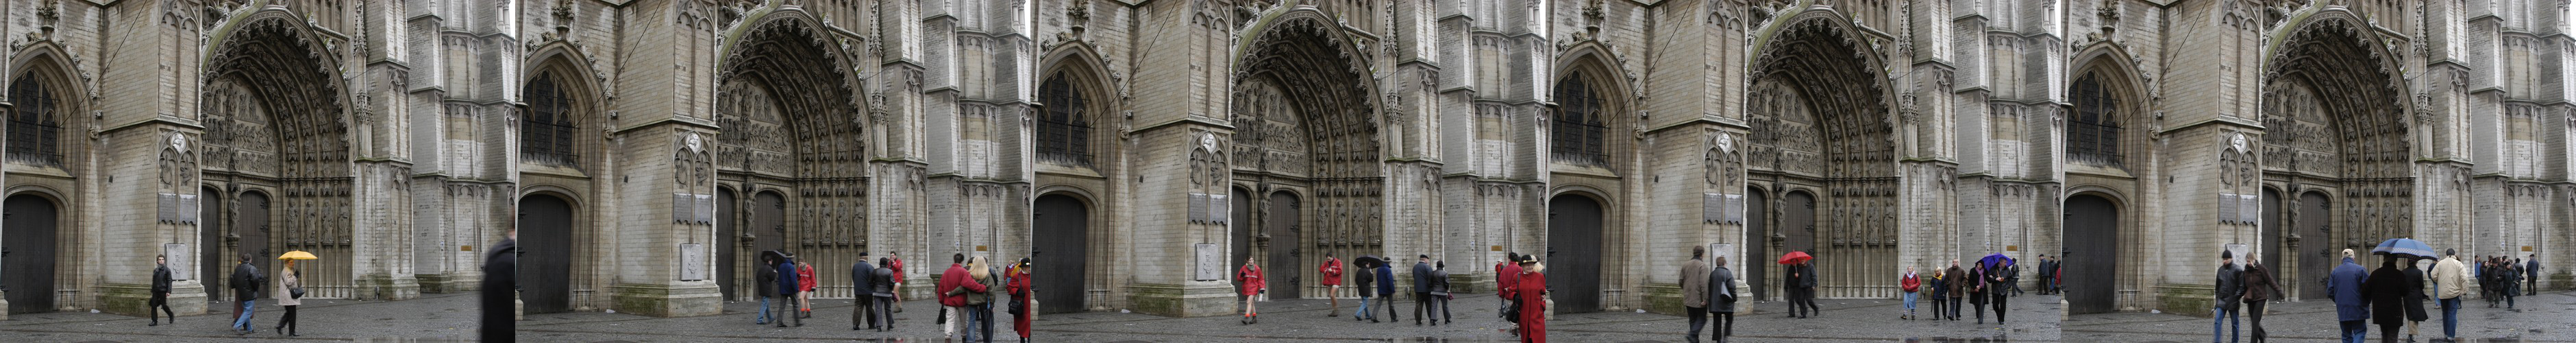

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy.lib.stride_tricks import as_strided

import PIL
%matplotlib inline
from pandas import DataFrame
import pandas as pd
from IPython.display import display, HTML
from skimage.exposure import rescale_intensity
import plotly.graph_objects as go
import pandas as pd
import json

import image_processing_utils as ipu

pd.options.display.html.border = 0
pd.options.display.float_format = '{:,.2f}'.format

def imshow(image: np.ndarray):
    im_out = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return PIL.Image.fromarray(im_out)

files = 'd001.jpg d002.jpg d003.jpg d004.jpg d005.jpg result.png'.split(' ')
files_paths = [os.path.join('..','data','cathedral', x) for x in files]

images = [cv2.imread(x, 1) for x in files_paths]
images, target = images[:-1], images[-1]

imshow(np.concatenate(images[:5],1) )

this approach will try to 

In [2]:
def absolute_squared_RGB_diff(rgb1, rgb2):
    return np.sum((rgb1-rgb2)**2)

In [27]:
# for each image, for each pixel add the errors with respect to the 
# values of the same pixel on other images
def get_error_maps(images: list):
    images_stacked= np.stack(images, axis=0).astype(int)
    
    s=images_stacked.shape
    differences = np.zeros((s[0],s[0])).tolist()
    for i in range(s[0]):
        for j in range(s[0]):
            img_1_2_diff = np.sum((images_stacked[i] - images_stacked[j])**2,axis=2)
            img_1_2_diff = (img_1_2_diff - np.min(img_1_2_diff)) / (np.max(img_1_2_diff) - np.min(img_1_2_diff))
            differences[i][j] = (img_1_2_diff*255).astype('uint8')
    

    return np.array(differences)

In [28]:
diff = get_error_maps(images)


/tmp/ipykernel_107300/895362313.py:11: RuntimeWarning: invalid value encountered in divide
  img_1_2_diff = (img_1_2_diff - np.min(img_1_2_diff)) / (np.max(img_1_2_diff) - np.min(img_1_2_diff))


In [29]:
diff.shape

(5, 5, 500, 752)

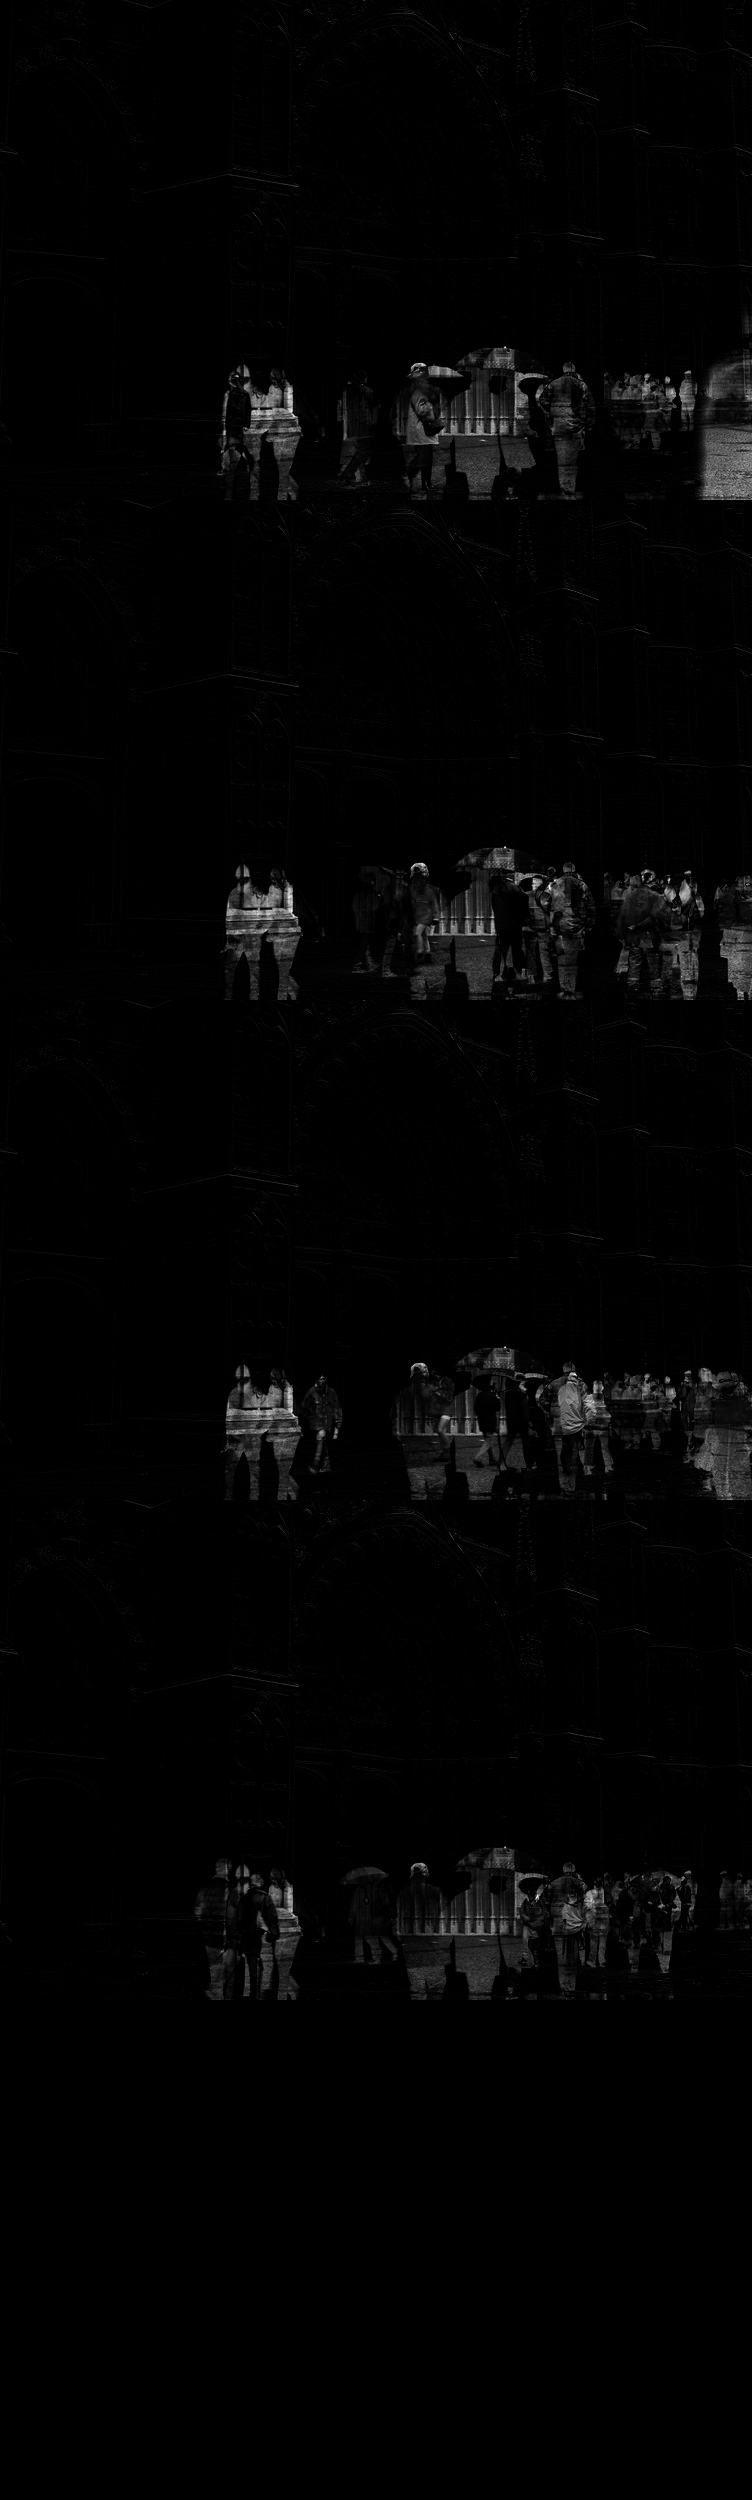

In [41]:
imshow(diff[4].reshape(-1,752))